IMPORTING NECESSARY LIBRARIES

In [ ]:
# First, install the xgboost package
!pip install xgboost
# Then import all your libraries
# Core Libraries
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing and Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor  # This will work after installation
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Warnings Handling
import warnings
warnings.filterwarnings('ignore')

DATA LOADING

In [ ]:
#GET DATA
data=pd.read_csv(r"/content/adult.data")
data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


CREATE COLUMNS FOR THE DATASET

In [ ]:
data.columns=["age", "workclass", "fnlwgt", "education", "educational-num", "marital-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


DATA INSPECTION

In [ ]:
data.shape

(32560, 15)

In [ ]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
data['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


DATA WRANGLING

In [ ]:
data["workclass"] = data["workclass"].str.strip().replace('?','Others')
print(data['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Others               1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [ ]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [ ]:
data.occupation.replace({' ?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Others                1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64


In [ ]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Others               1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Name: count, dtype: int64


In [ ]:
print(data.relationship.value_counts())

relationship
Husband           13189
Not-in-family      8303
Own-child          5058
Unmarried          3444
Wife               1564
Other-relative      981
Name: count, dtype: int64


EXPLORATORY DATA ANALYSIS

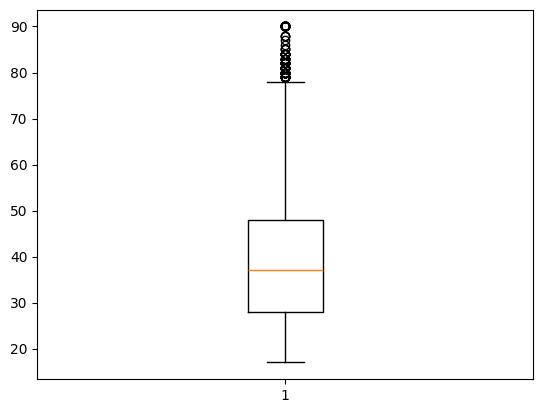

In [ ]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [ ]:
data=data[(data['age']<=75)&(data['age']>=17)]

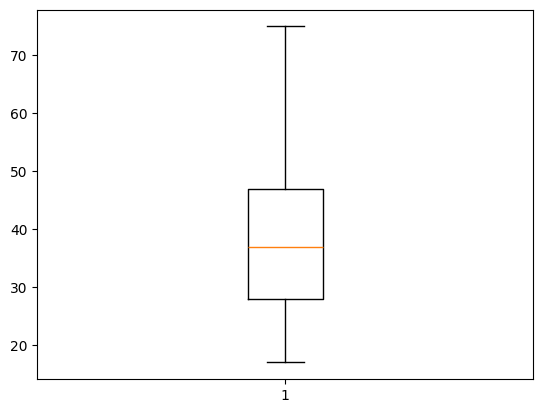

In [ ]:
plt.boxplot(data['age'])
plt.show()

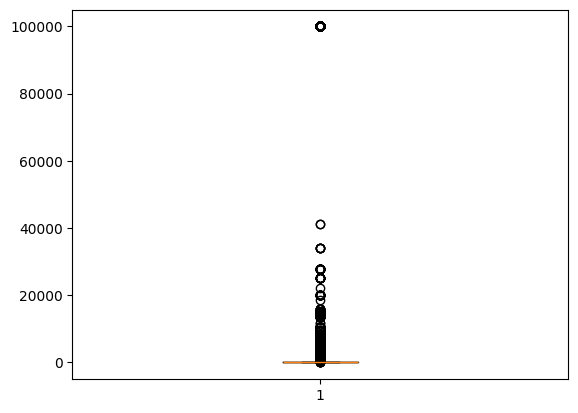

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

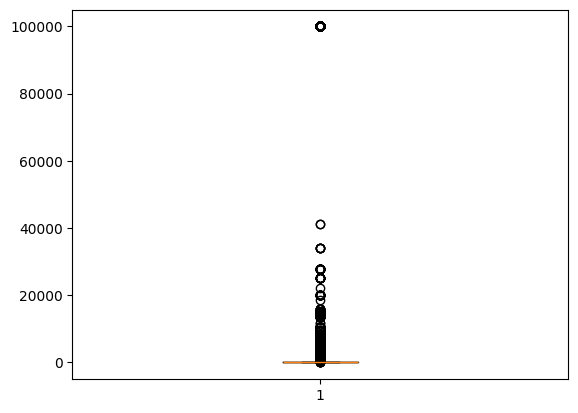

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

In [ ]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

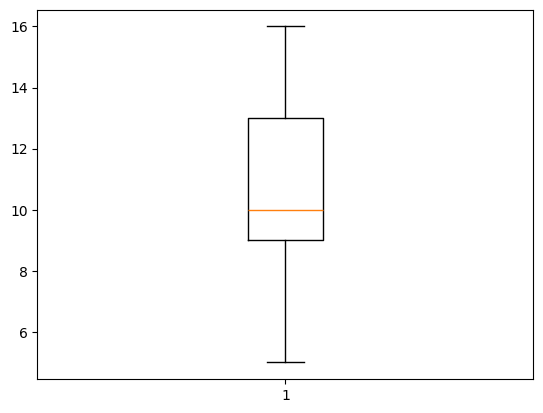

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

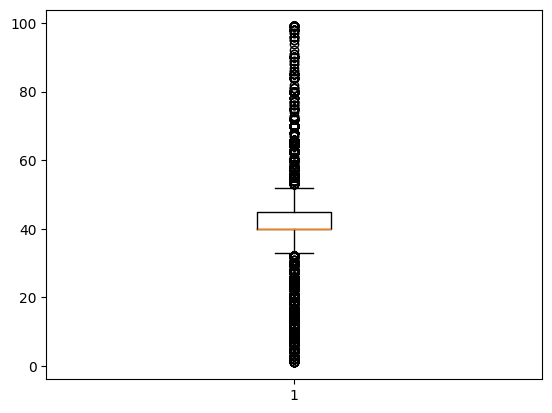

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [ ]:
data=data.drop(columns=['education']) #redundant features removal

In [ ]:

encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])

In [ ]:
x=data.drop(columns="income", axis=1)
y=data['income']
x.head(12)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,50,5,83311,13,2,3,0,4,1,0,0,13,39
1,38,3,215646,9,0,5,1,4,1,0,0,40,39
2,53,3,234721,7,2,5,0,2,1,0,0,40,39
3,28,3,338409,13,2,9,5,2,0,0,0,40,5
4,37,3,284582,14,2,3,5,4,0,0,0,40,39
5,49,3,160187,5,3,7,1,2,0,0,0,16,23
6,52,5,209642,9,2,3,0,4,1,0,0,45,39
7,31,3,45781,14,4,9,1,4,0,14084,0,50,39
8,42,3,159449,13,2,3,0,4,1,5178,0,40,39
9,37,3,280464,10,2,3,0,2,1,0,0,80,39


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8181
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.88      4625
        >50K       0.72      0.48      0.58      1604

    accuracy                           0.82      6229
   macro avg       0.78      0.71      0.73      6229
weighted avg       0.81      0.82      0.80      6229

RandomForest Accuracy: 0.8533
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4625
        >50K       0.77      0.62      0.68      1604

    accuracy                           0.85      6229
   macro avg       0.82      0.78      0.79      6229
weighted avg       0.85      0.85      0.85      6229

KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      4625
        >50K       0.69      0.58      0.63      1604

    accuracy                           0.82      6229
   macro avg       0.78      0.74      0.

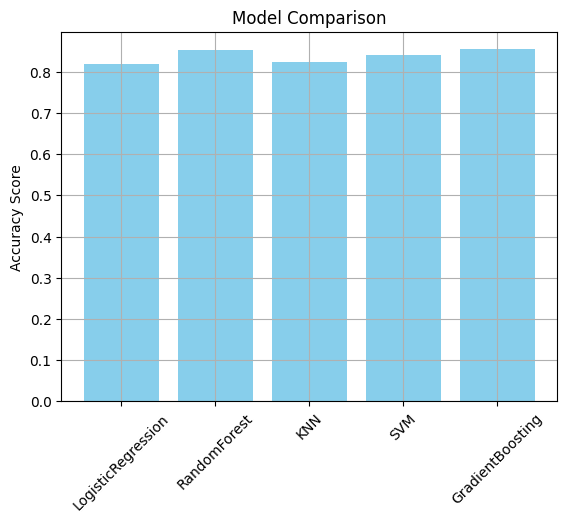

In [ ]:
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
import joblib
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")

LogisticRegression: 0.7953
RandomForest: 0.8510
KNN: 0.7679
SVM: 0.7817
GradientBoosting: 0.8546

✅ Best model: GradientBoosting with accuracy 0.8546
✅ Saved best model as best_model.pkl


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
!pip install streamlit
# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')



Overwriting app.py


In [ ]:
!streamlit run app.py

/bin/bash: line 1: streamlit: command not found


In [ ]:
print(data['occupation'].unique())

[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
